## SMM636 Machine Learning Individual Coursework - Rucha Raut


In [1]:
#Import required libraries
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, auc, roc_curve,roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.discriminant_analysis import \
(LinearDiscriminantAnalysis as LDA, QuadraticDiscriminantAnalysis as QDA)
from sklearn.naive_bayes import GaussianNB
from sklearn.inspection import DecisionBoundaryDisplay

#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#read the csv file
df = pd.read_csv('heart-disease.csv')

## Data Dictionary

Aim is to predict the coronary heart disease (chd: 1/0) for males in a heart-disease high-risk region of the Western Cape, South Africa, described by the following nine features:
- sbp: systolic blood pressure
- tobacco: cumulative tobacco (kg)
- ldl: low density lipoprotein cholesterol
- adiposity
- famhist: family history of heart disease
- typea: type-A behavior
- obesity
- alcohol: current alcohol consumption
- age

## Exploratory Data Analysis

In [3]:
df.head() # Look into the csv file 

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


In [4]:
df.info() #check for null values and data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sbp        462 non-null    int64  
 1   tobacco    462 non-null    float64
 2   ldl        462 non-null    float64
 3   adiposity  462 non-null    float64
 4   famhist    462 non-null    object 
 5   typea      462 non-null    int64  
 6   obesity    462 non-null    float64
 7   alcohol    462 non-null    float64
 8   age        462 non-null    int64  
 9   chd        462 non-null    int64  
dtypes: float64(5), int64(4), object(1)
memory usage: 36.2+ KB


In [5]:
df.describe() # Summary Statistics

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,chd
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,138.326840,3.635649,4.740325,25.406732,53.103896,26.044113,17.044394,42.816017,0.346320
std,20.496317,4.593024,2.070909,7.780699,9.817534,4.213680,24.481059,14.608956,0.476313
min,101.000000,0.000000,0.980000,6.740000,13.000000,14.700000,0.000000,15.000000,0.000000
25%,124.000000,0.052500,3.282500,19.775000,47.000000,22.985000,0.510000,31.000000,0.000000
50%,134.000000,2.000000,4.340000,26.115000,53.000000,25.805000,7.510000,45.000000,0.000000
75%,148.000000,5.500000,5.790000,31.227500,60.000000,28.497500,23.892500,55.000000,1.000000
max,218.000000,31.200000,15.330000,42.490000,78.000000,46.580000,147.190000,64.000000,1.000000


In [6]:
#check for missing values
df.isnull().sum()

sbp          0
tobacco      0
ldl          0
adiposity    0
famhist      0
typea        0
obesity      0
alcohol      0
age          0
chd          0
dtype: int64

In [7]:
# check unique values
df.nunique()

sbp           62
tobacco      214
ldl          329
adiposity    408
famhist        2
typea         54
obesity      400
alcohol      249
age           49
chd            2
dtype: int64

In [8]:
# Separate categorical and Numerical variables
cat_cols=df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['famhist'], dtype='object')
Numerical Variables:
['sbp', 'tobacco', 'ldl', 'adiposity', 'typea', 'obesity', 'alcohol', 'age', 'chd']


In [9]:
#Convert the categorical variable 'famhist' to a numerical variable. 

# Define mapping from string values to binary values
mapping = {'Present': 1, 'Absent': 0}

# Apply mapping to each column
df['famhist'] = df['famhist'].map(mapping)

In [10]:
# Extract feature names from the DataFrame for further calculations
feature_names = df.columns.tolist()

# Drop 'chd' from the list of features
feature_names.remove('chd')

# Print the feature names
print(feature_names)

['sbp', 'tobacco', 'ldl', 'adiposity', 'famhist', 'typea', 'obesity', 'alcohol', 'age']


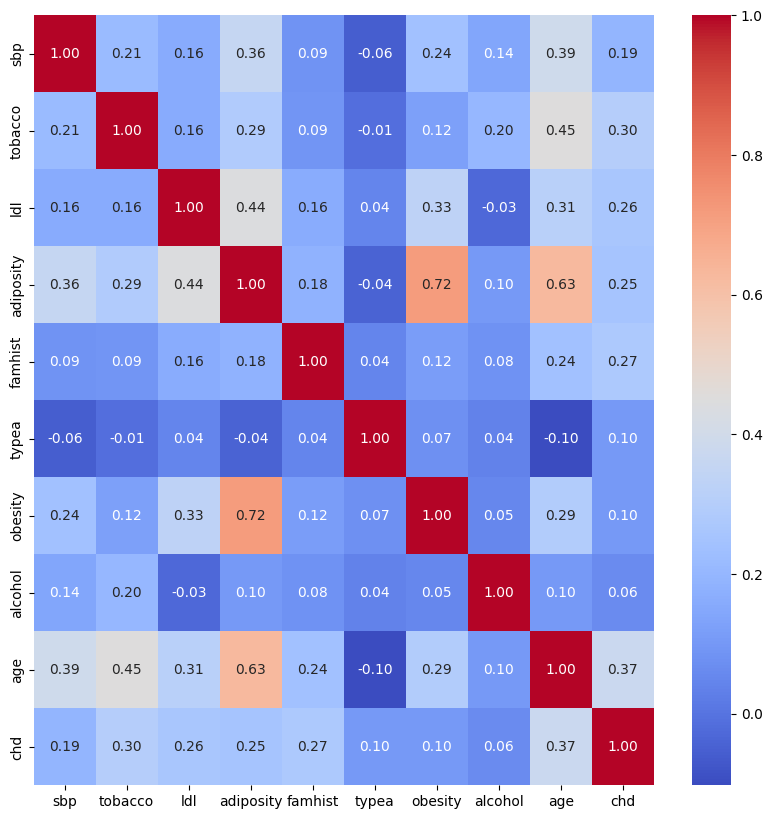

In [11]:
#check correlation between variables
plt.figure(figsize=(10, 10))  # Adjust size as needed
sns.heatmap(df.corr(), annot=True, fmt=".2f",cmap='coolwarm')
plt.savefig("correlation_heatmap.png")

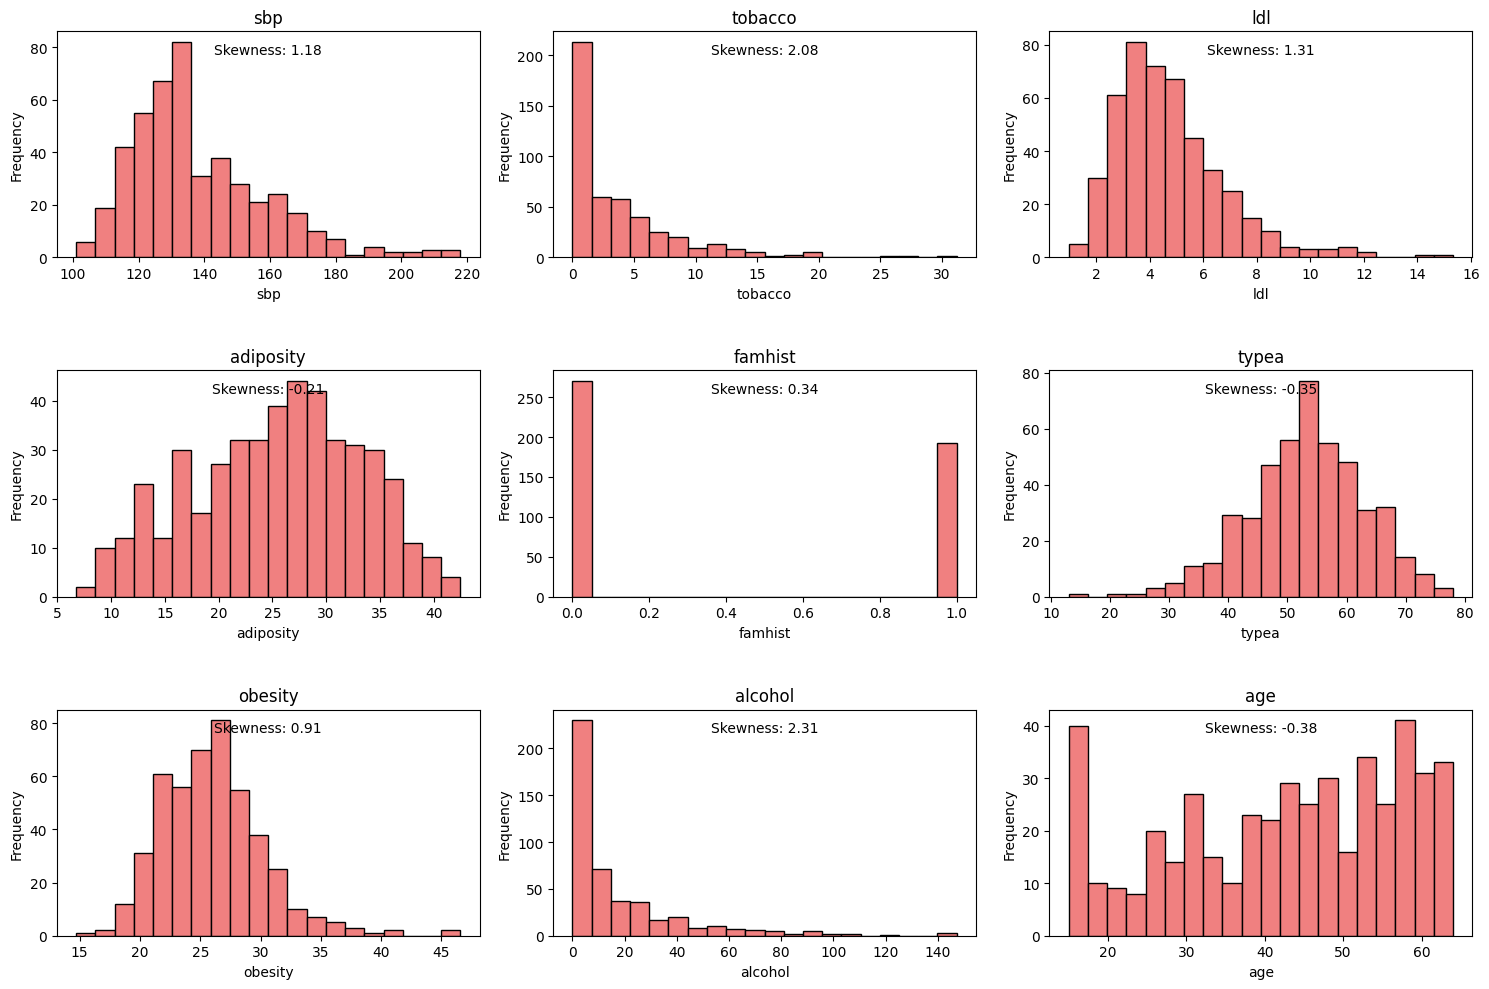

In [12]:
# Calculate skewness for each column
skew_values = df.skew()

# Create subplots for histograms
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))

# Flatten the axes for easier iteration
axes = axes.flatten()

# Plot histograms for each column
for i, col in enumerate(df.columns):
    if col != 'chd':  # Exclude the target variable from histograms
        df[col].plot(kind='hist', ax=axes[i], bins=20, edgecolor='black', color='lightcoral')
        axes[i].set_title(col)
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')
        
        # Add skewness value to the histogram
        axes[i].annotate(f"Skewness: {skew_values[col]:.2f}", xy=(0.5, 0.9), xycoords='axes fraction', ha='center')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Adjust space between rows
plt.subplots_adjust(hspace=0.5)

# Save the image
plt.savefig('histograms_with_skewness.png')
plt.show()

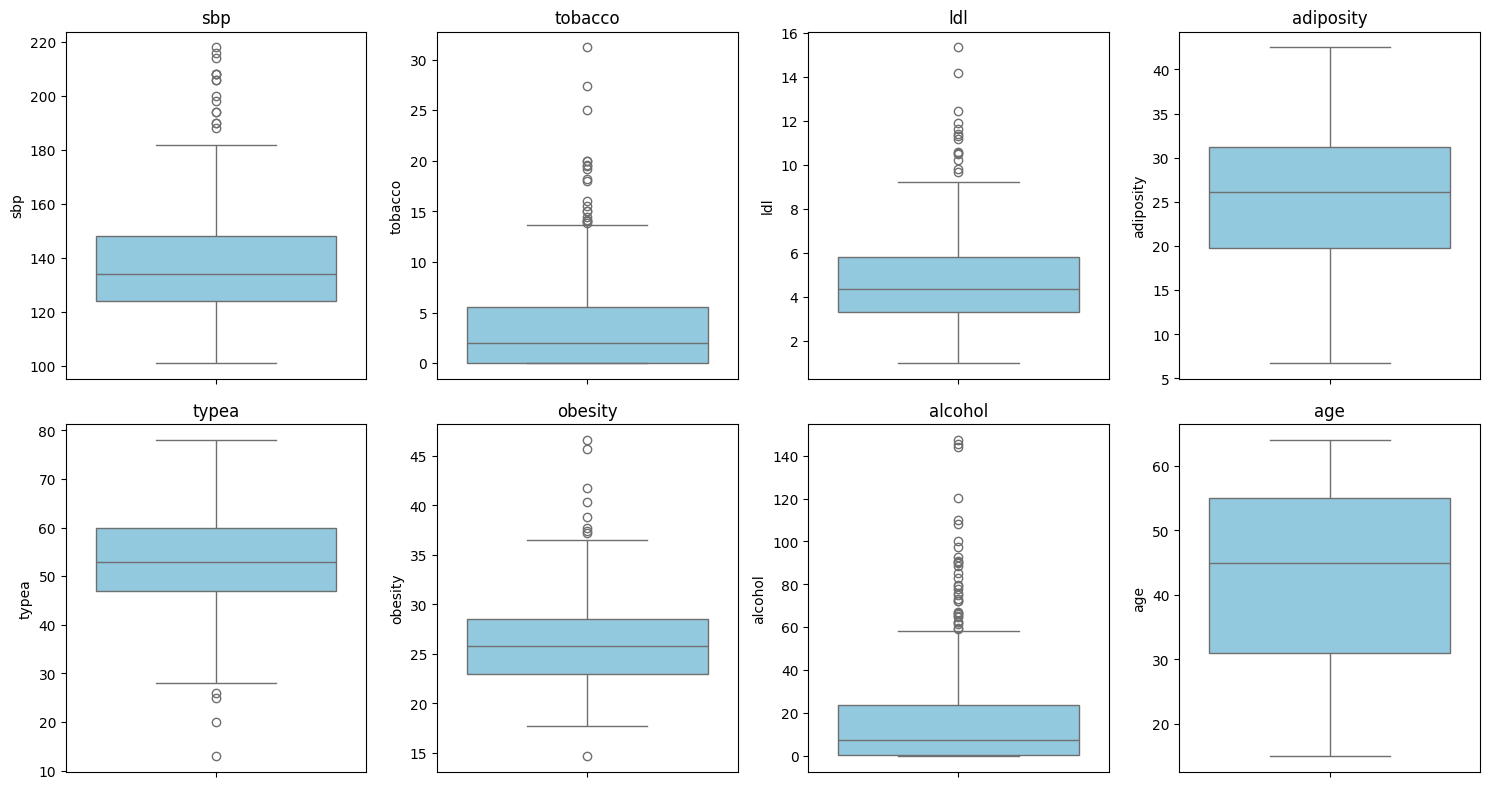

In [13]:
#Boxplots 

# Create subplots for boxplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 8))

# Flatten the axes for easier iteration
axes = axes.flatten()

# Plot boxplots for each column with Seaborn
subplot_index = 0
for col in df.columns:
    if col != 'famhist':  # Exclude the 'famhist' feature
        if subplot_index < len(axes):  # Ensure subplot index doesn't exceed the number of available subplots
            sns.boxplot(y=df[col], ax=axes[subplot_index], color='skyblue', orient='v')
            axes[subplot_index].set_title(col)
            subplot_index += 1

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.savefig('feature boxplots.png')
plt.show()

In [14]:
#Detect Outliers using interquartile range (Refer to the boxplots for reference)

def detect_outliers_iqr(df, threshold=1.5):
    outliers_dict = {}
    for column in df.columns:
        if np.issubdtype(df[column].dtype, np.number):  # Check if the column contains numeric data
            column_data = df[column]
            quartile_1, quartile_3 = np.percentile(column_data, [25, 75])
            iqr = quartile_3 - quartile_1
            lower_bound = quartile_1 - (iqr * threshold)
            upper_bound = quartile_3 + (iqr * threshold)
            outlier_indices = np.where((column_data < lower_bound) | (column_data > upper_bound))[0]
            outliers_dict[column] = outlier_indices
    return outliers_dict

outliers_dict = detect_outliers_iqr(df)
for column, indices in outliers_dict.items():
    print(f"Outliers indices for column '{column}':", indices)


Outliers indices for column 'sbp': [ 10  94 161 170 219 229 242 282 314 345 397 403 407 413 457]
Outliers indices for column 'tobacco': [ 11  19  24 114 140 149 161 179 186 235 284 306 333 384 406 407 410 416
 422]
Outliers indices for column 'ldl': [ 16  25  26  98 115 125 243 345 382 387 404 410 412 460]
Outliers indices for column 'adiposity': []
Outliers indices for column 'famhist': []
Outliers indices for column 'typea': [117 218 336 375]
Outliers indices for column 'obesity': [ 26  44  81 107 181 221 271 313 461]
Outliers indices for column 'alcohol': [  0  53  55  65  79 105 131 154 155 157 200 230 234 242 250 284 298 308
 314 320 339 342 345 371 374 376 381 397 398 420 422 426 449]
Outliers indices for column 'age': []
Outliers indices for column 'chd': []


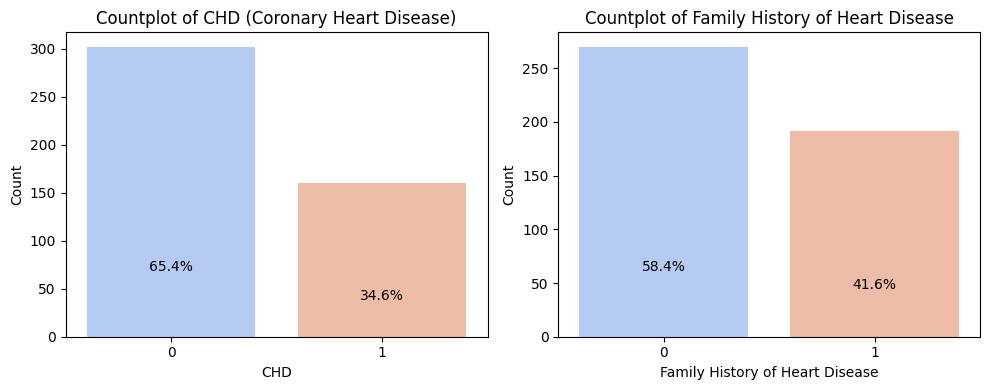

In [15]:
#Countplot for categorical variables (Check imbalance in target variable 'chd')

# Calculate percentage values for 'chd'
chd_counts = df['chd'].value_counts(normalize=True) * 100

# Calculate percentage values for 'famhist'
famhist_counts = df['famhist'].value_counts(normalize=True) * 100

# Create figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Create countplot for 'chd' with percentage annotations
sns.countplot(x='chd', data=df, palette='coolwarm', ax=axes[0])
axes[0].set_title('Countplot of CHD (Coronary Heart Disease)')
axes[0].set_xlabel('CHD')
axes[0].set_ylabel('Count')

# Annotate bars with percentage values for 'chd'
for i, count in enumerate(chd_counts):
    axes[0].text(i, count, f'{count:.1f}%', ha='center', va='bottom')

# Create countplot for 'famhist' with percentage annotations
sns.countplot(x='famhist', data=df, palette='coolwarm', ax=axes[1])
axes[1].set_title('Countplot of Family History of Heart Disease')
axes[1].set_xlabel('Family History of Heart Disease')
axes[1].set_ylabel('Count')

# Annotate bars with percentage values for 'famhist'
for i, count in enumerate(famhist_counts):
    axes[1].text(i, count, f'{count:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [16]:
# Find duplicate rows
duplicate_rows = df[df.duplicated(keep=False)]

# Count duplicate rows
duplicate_count = duplicate_rows.shape[0]

# Show duplicate rows
print("Duplicate Rows:")
print(duplicate_rows)

# Show duplicate count
print("Number of Duplicate Rows:", duplicate_count)

Duplicate Rows:
Empty DataFrame
Columns: [sbp, tobacco, ldl, adiposity, famhist, typea, obesity, alcohol, age, chd]
Index: []
Number of Duplicate Rows: 0


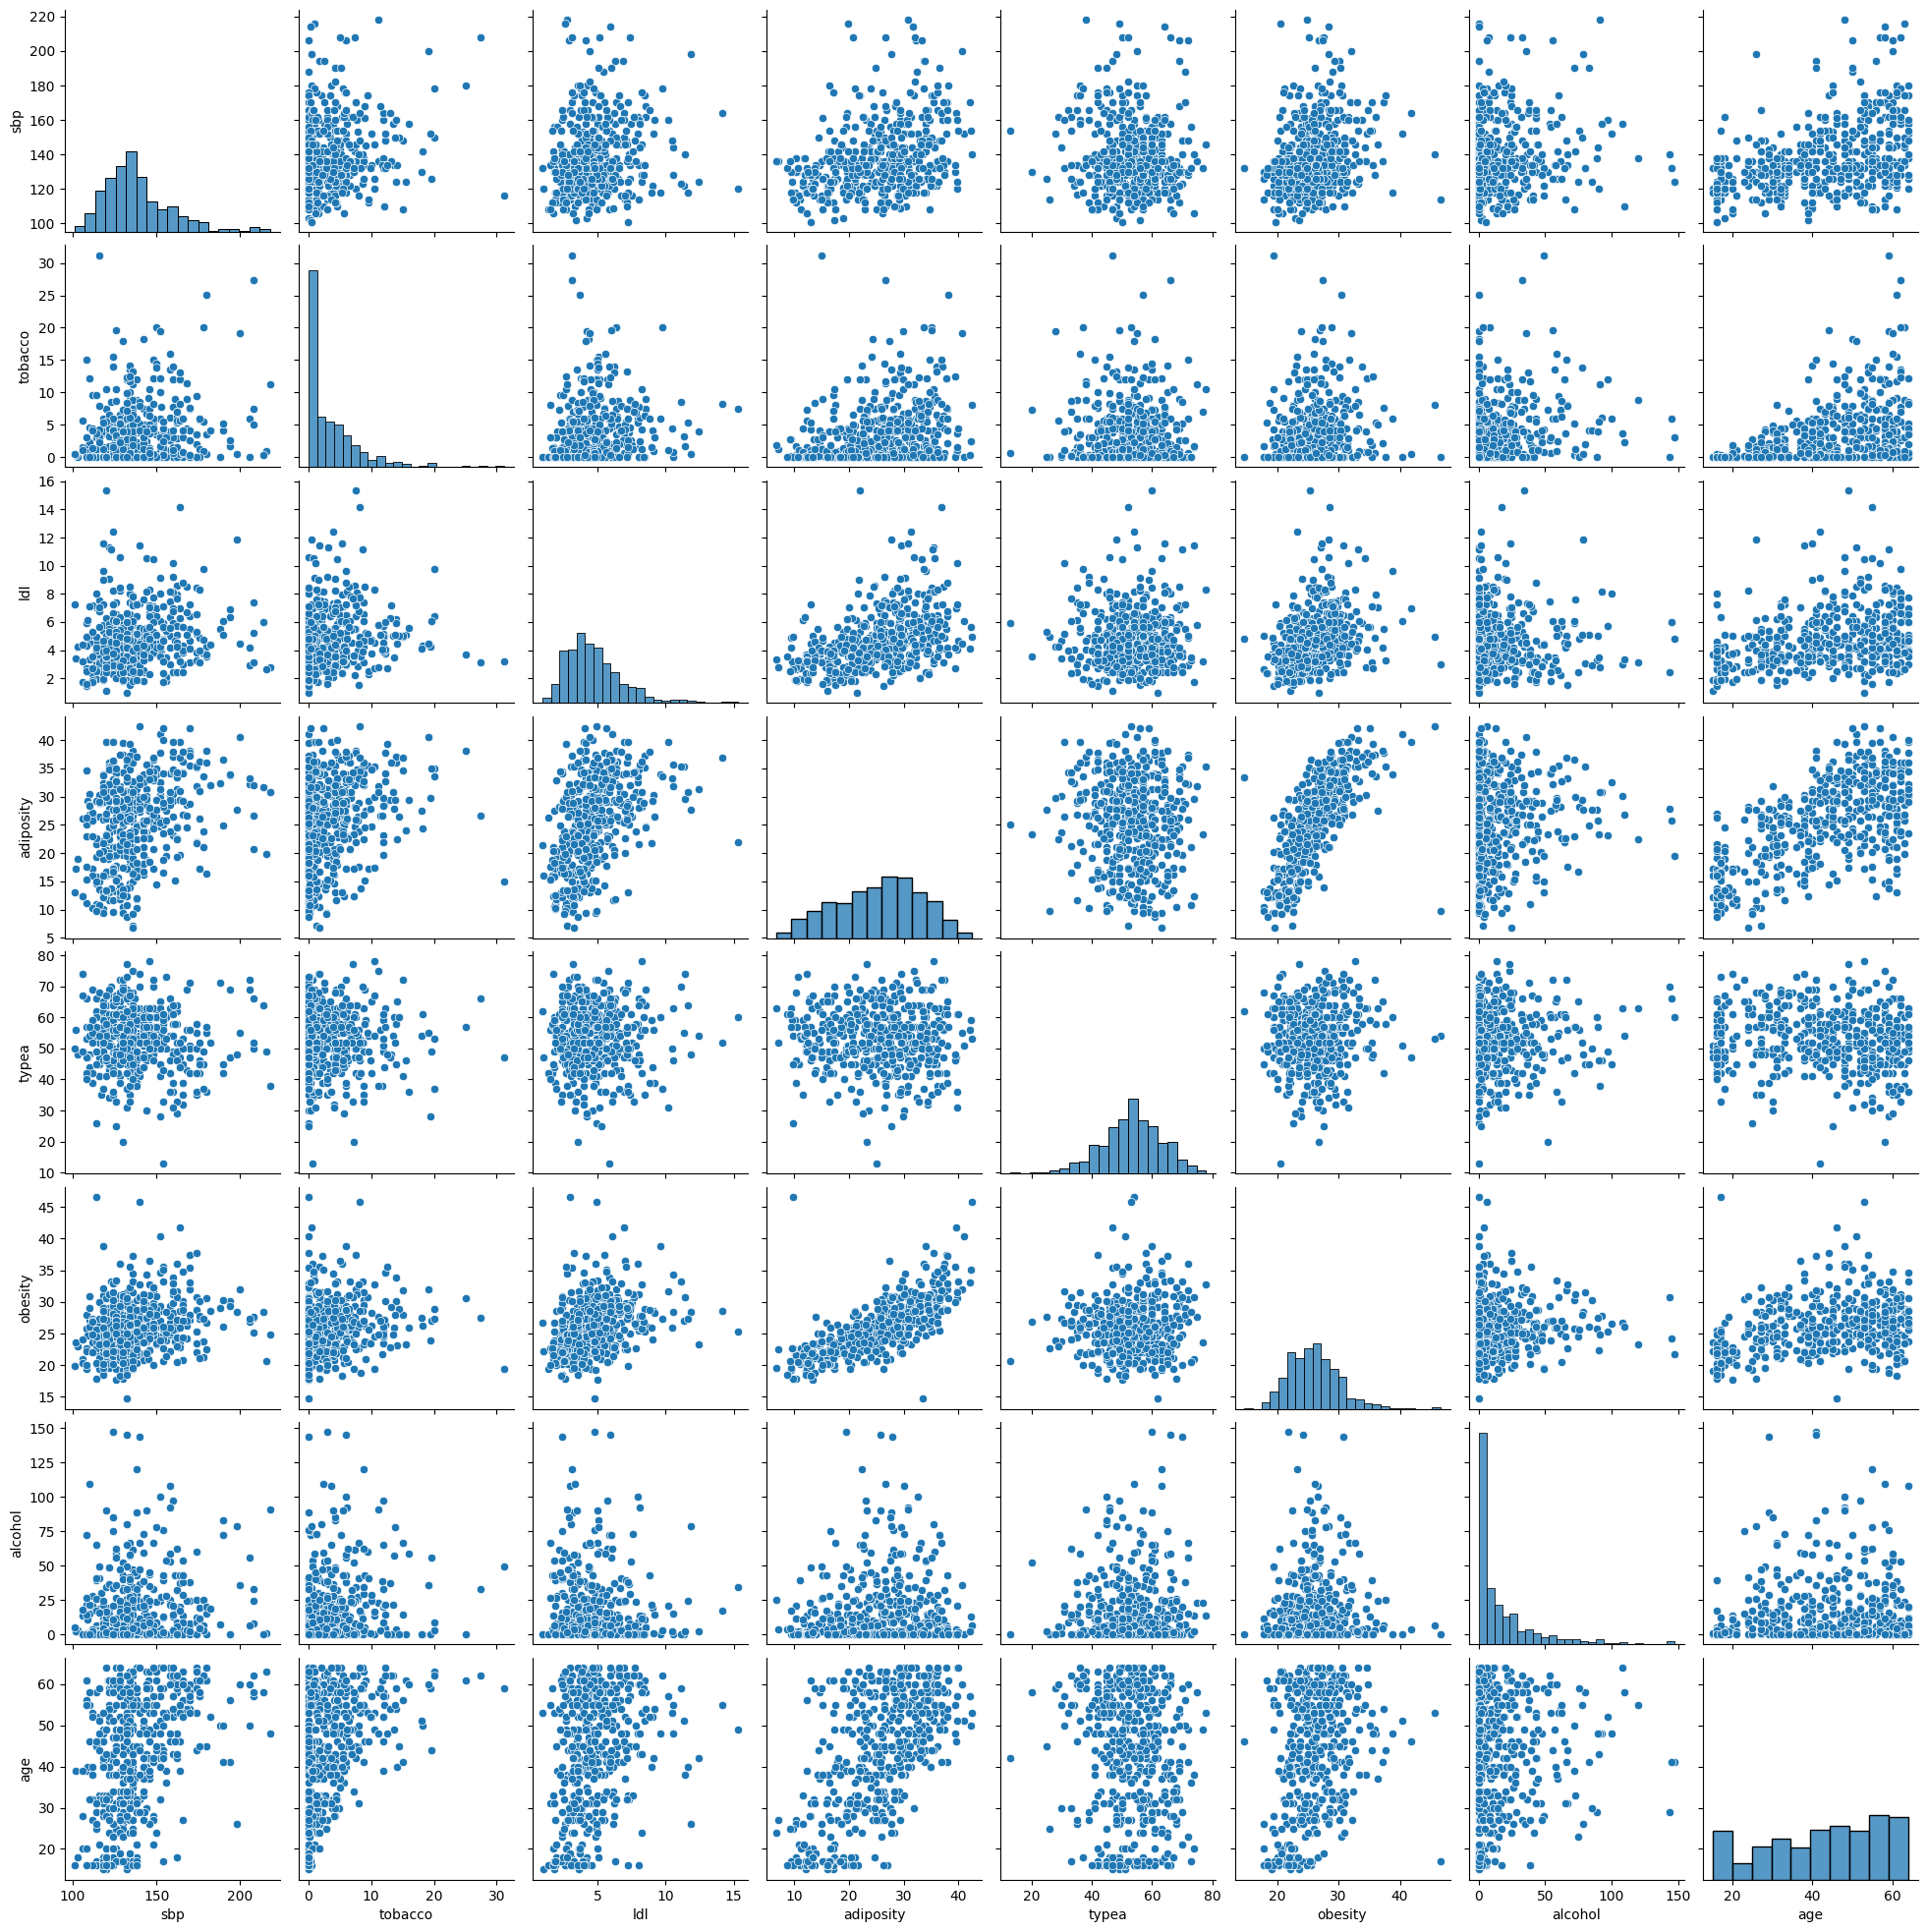

In [17]:
# Remove 'famhist' and 'chd' from the DataFrame for pairplot
df_subset = df.drop(columns=['famhist', 'chd'])

# Create pairplot for all variables except 'famhist' and 'chd'
sns.pairplot(df_subset)
plt.savefig("pairplots.png")
plt.show()

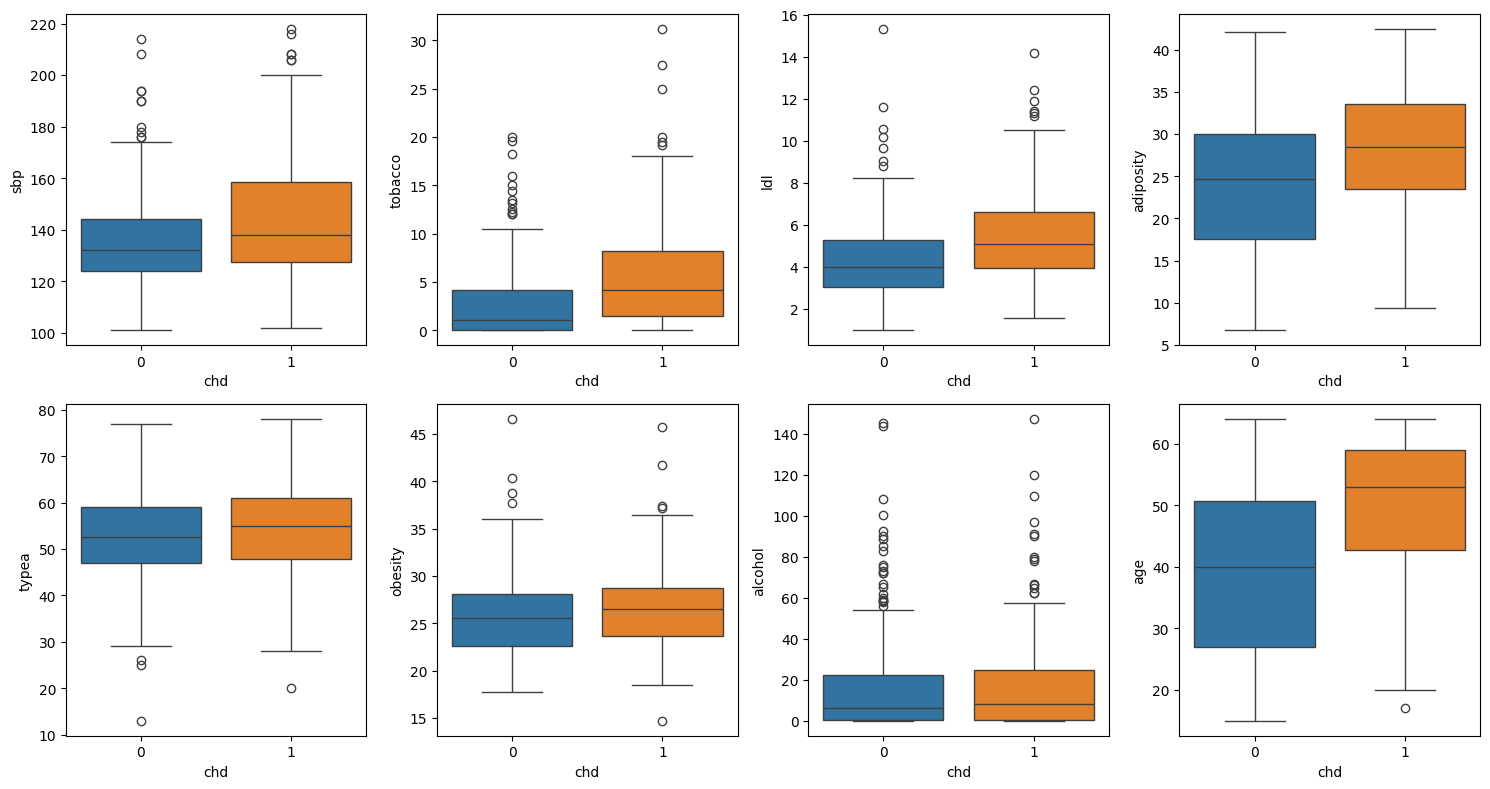

In [18]:
# Boxplots between the target variable and the 9 features
fig, axes = plt.subplots(2, 4, figsize=(15, 8))

# Iterate through each feature and create boxplots against the target variable
subplot_index = 0
for i, feature in enumerate(feature_names):
    if feature != 'famhist':  # Exclude 'famhist' feature
        row = subplot_index // 4
        col = subplot_index % 4
        sns.boxplot(x='chd', y=feature, data=df, hue='chd', ax=axes[row, col], legend=False)
        subplot_index += 1

# Adjust layout
plt.tight_layout()
plt.savefig('Chd boxplots.png')
plt.show()

## Logistic Regression with Ridge (L2)

In [19]:
# Separate features (X) and target variable (y)
X = df.drop('chd', axis=1)  # Features
y = df['chd']  # Target variable

In [20]:
X.std() #check if scaling is needed

sbp          20.496317
tobacco       4.593024
ldl           2.070909
adiposity     7.780699
famhist       0.493357
typea         9.817534
obesity       4.213680
alcohol      24.481059
age          14.608956
dtype: float64

In [21]:
# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [22]:
#Test Assumption of Multi-Collinearity in logistic regression

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Compute VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

print(vif_data)

# all VIF scores are below 5 but adiposity has a higher vif compared to others.

     Feature       VIF
0        sbp  1.226476
1    tobacco  1.299922
2        ldl  1.274402
3  adiposity  3.591427
4    famhist  1.081329
5      typea  1.042878
6    obesity  2.289218
7    alcohol  1.072561
8        age  2.196918


In [23]:
# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Check the shapes of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (369, 9)
Shape of X_test: (93, 9)
Shape of y_train: (369,)
Shape of y_test: (93,)


In [24]:
#Cross Validation to select an appropriate tuning parameter

# Define the range of values for C to search
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Instantiate a logistic regression model
lr = LogisticRegression(penalty='l2')

# Use GridSearchCV to search for the best C value using cross-validation
grid_search = GridSearchCV(lr, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Retrieve the best parameter value (C) found by the grid search
best_C = grid_search.best_params_['C']

# Print the best parameter found
print("Best parameter for C:", grid_search.best_params_)

# Print the corresponding best accuracy score
print("Best accuracy score:", grid_search.best_score_)


Best parameter for C: {'C': 10}
Best accuracy score: 0.7101351351351352


In [25]:
#Fit logistic regression with ridge penalty
lr_l2 = LogisticRegression(penalty='l2', C=best_C) #Note that here `C` is the inverse of $\lambda$. C is chosen using cross validation
lr_l2.fit(X_train,y_train)

LogisticRegression(C=10)

In [26]:
#The coefficients 
lr_l2.coef_.shape

(1, 9)

In [27]:
print(lr_l2.coef_, lr_l2.intercept_)

[[ 0.16486239  0.25816806  0.34614995  0.21093369  0.40033399  0.4020916
  -0.34359342  0.04648935  0.6887917 ]] [-0.90077035]


In [28]:
# Create a DataFrame with feature names and coefficients
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': lr_l2.coef_[0]})

# Print the DataFrame
print(coefficients_df)

     Feature  Coefficient
0        sbp     0.164862
1    tobacco     0.258168
2        ldl     0.346150
3  adiposity     0.210934
4    famhist     0.400334
5      typea     0.402092
6    obesity    -0.343593
7    alcohol     0.046489
8        age     0.688792


In [29]:
#no coefficient is exactly zero
np.count_nonzero(lr_l2.coef_==0)

0

Predict Test Set with Fitted Models with Ridge

In [30]:
# Prediction test 
pred_l2 = lr_l2.predict(X_test)

In [31]:
#check accuracies
accuracy_lr_l2 = accuracy_score(pred_l2, y_test)
print('The accuracy score of LR with ridge penalty is',accuracy_lr_l2 )

The accuracy score of LR with ridge penalty is 0.7849462365591398


In [32]:
# print classification report
print(classification_report(y_test, pred_l2))

              precision    recall  f1-score   support

           0       0.78      0.92      0.84        59
           1       0.79      0.56      0.66        34

    accuracy                           0.78        93
   macro avg       0.79      0.74      0.75        93
weighted avg       0.79      0.78      0.77        93



Draw coefficient paths against the value of `C` (or $\lambda$ in lecture)

In [33]:
Cs = np.logspace(-5, 1, 300)

coefs = []
acc = []

for c in Cs:
    lr_l2 = LogisticRegression(penalty='l2', C=c, max_iter=500)  # train a logistic regression model with ridge penalty
    lr_l2.fit(X_train, y_train)
    coefs.append(lr_l2.coef_[0])  # Remove index [1] when accessing coefficients
    pred_l2 = lr_l2.predict(X_test)
    acc.append(accuracy_score(pred_l2, y_test))

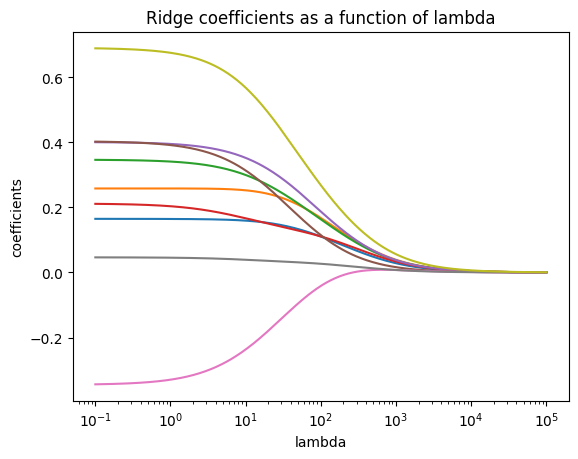

In [34]:
fig, ax = subplots()
ax.plot(1/Cs,np.asarray(coefs)) 
ax.set_xscale("log")
ax.set(xlabel='lambda', ylabel='coefficients', title='Ridge coefficients as a function of lambda') 
fig.savefig('ridge-path.png')

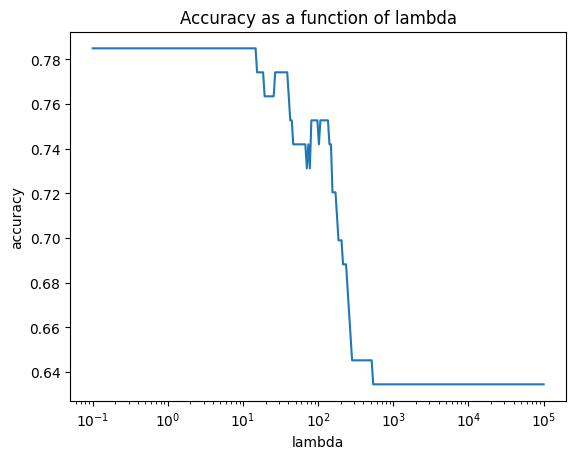

In [35]:
fig, ax = subplots()
ax.plot(1/Cs,np.asarray(acc)) #have a look at accuracy against lambda
ax.set_xscale("log")
ax.set(xlabel='lambda', ylabel='accuracy', title='Accuracy as a function of lambda')
fig.savefig('ridge-acc.png')

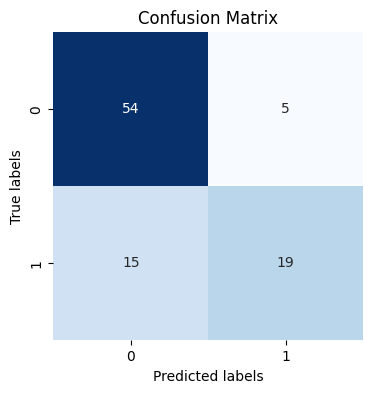

In [36]:
#Confusion Matrix

plt.figure(figsize=(4, 4))
sns.heatmap(confusion_matrix(y_test, pred_l2), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

# Save and show the plot
plt.savefig('confusion_matrix_lr.png')
plt.show()

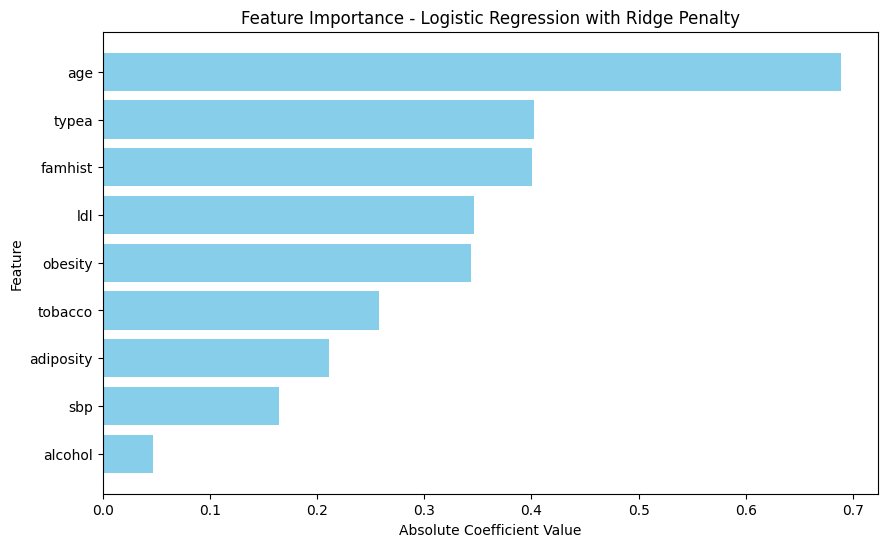

In [37]:
# Extracting coefficients and feature names
coefficients = lr_l2.coef_[0]

# Calculate absolute values of coefficients
abs_coefficients = np.abs(coefficients)

# Sort coefficients and feature names in ascending order of absolute coefficient values
sorted_indices = np.argsort(abs_coefficients)
sorted_coefficients = abs_coefficients[sorted_indices]
sorted_feature_names = [feature_names[i] for i in sorted_indices]

# Plotting feature importance
plt.figure(figsize=(10, 6))
plt.barh(sorted_feature_names, sorted_coefficients, color='skyblue')
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance - Logistic Regression with Ridge Penalty')
plt.grid(False)

plt.savefig('Feature Importance_LR_Ridge.png')
plt.show()

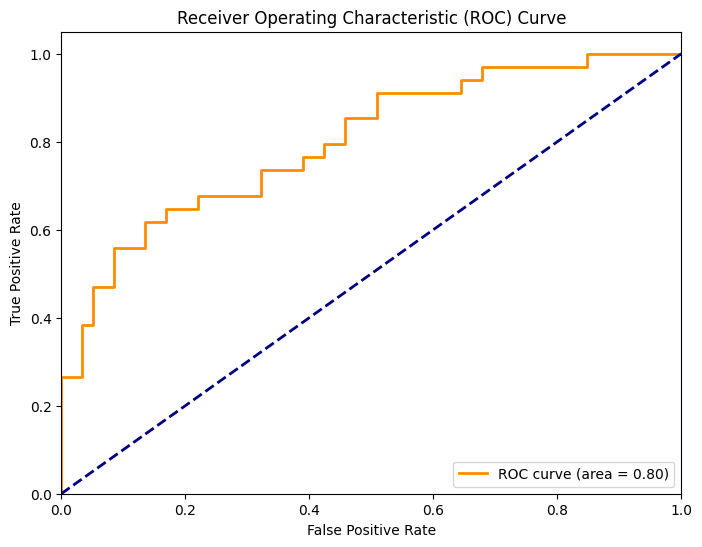

In [38]:
# ROC AUC Curve

# Get the probabilities for the positive class (class 1)
probs = lr_l2.predict_proba(X_test)[:, 1]

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, probs)

# Calculate the Area Under the ROC Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.savefig('ROC-AUC Curve_LR.png')
plt.show()

In [39]:
roc_auc

0.8010967098703888

## K Nearest Neighbours

In [40]:
# set tuning values
tuned_parameters = [{"n_neighbors": [1, 3, 5, 7, 9]}]

# tune the parameter by k-fold cross-validation
knn = GridSearchCV(KNeighborsClassifier(), tuned_parameters, scoring='accuracy', cv=10)
knn.fit(X_train, y_train)

print("Best parameters set found on validation set:")
print()
print(knn.best_params_)
print()
print("Grid scores on validation set:")
print()
means = knn.cv_results_["mean_test_score"]
stds = knn.cv_results_["std_test_score"]
for mean, std, params in zip(means, stds, knn.cv_results_["params"]):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std, params))



Best parameters set found on validation set:

{'n_neighbors': 9}

Grid scores on validation set:

0.658 (+/-0.041) for {'n_neighbors': 1}
0.680 (+/-0.057) for {'n_neighbors': 3}
0.688 (+/-0.059) for {'n_neighbors': 5}
0.688 (+/-0.059) for {'n_neighbors': 7}
0.691 (+/-0.073) for {'n_neighbors': 9}


In [41]:
# predict test set labels
ypred_knn = knn.predict(X_test)

#accuracy score
accuracy_knn = accuracy_score(y_test,ypred_knn)

print('Accuracy Score for K Nearest Neighnour is',accuracy_knn)

Accuracy Score for K Nearest Neighnour is 0.7204301075268817


In [42]:
#Summary Statistics
print(classification_report(y_test, ypred_knn))


              precision    recall  f1-score   support

           0       0.70      0.97      0.81        59
           1       0.83      0.29      0.43        34

    accuracy                           0.72        93
   macro avg       0.77      0.63      0.62        93
weighted avg       0.75      0.72      0.68        93



In [43]:
#Confusion Matrix 
confusion_matrix(y_test, ypred_knn)

array([[57,  2],
       [24, 10]], dtype=int64)

In [44]:
#ROC AUC Score

# Calculate the false positive rate, true positive rate, and thresholds
fpr_knn, tpr_knn, threshold = roc_curve(y_test, ypred_knn)
# Calculate area under the curve
roc_auc_knn = auc(fpr_knn, tpr_knn)
print("AUC Score for K Nearest Neighbours:", roc_auc_knn)

AUC Score for K Nearest Neighbours: 0.6301096709870389


## Decision Tree

In [45]:
# set tuning values
tuned_parameters = [{"ccp_alpha": [ 1.0, 0.1, 0.01, 0.001, 0.0001, 0.00001]}]
treeCV = GridSearchCV(DecisionTreeClassifier(random_state=67), tuned_parameters, scoring='accuracy',cv=10)

treeCV.fit(X_train, y_train)
print("Best parameters set found on validation set:")
print()
print(treeCV.best_params_)
print()
print("Grid scores on validation set:")
print()
means = treeCV.cv_results_["mean_test_score"]
stds = treeCV.cv_results_["std_test_score"]
for mean, std, params in zip(means, stds, treeCV.cv_results_["params"]):
        print("%0.4f (+/-%0.04f) for %r" % (mean, std, params))

Best parameters set found on validation set:

{'ccp_alpha': 1.0}

Grid scores on validation set:

0.6586 (+/-0.0124) for {'ccp_alpha': 1.0}
0.6586 (+/-0.0124) for {'ccp_alpha': 0.1}
0.6558 (+/-0.0487) for {'ccp_alpha': 0.01}
0.6501 (+/-0.0689) for {'ccp_alpha': 0.001}
0.6501 (+/-0.0689) for {'ccp_alpha': 0.0001}
0.6501 (+/-0.0689) for {'ccp_alpha': 1e-05}


In [46]:
# predict test set labels
ypred_tree = treeCV.predict(X_test)

# accuracy score
accuracy_dt = accuracy_score(y_test,ypred_tree)

print('The accuracy score of Decision Tree Model is', accuracy_dt)

The accuracy score of Decision Tree Model is 0.6344086021505376


In [47]:
#Summary Statistics
print(classification_report(y_test, ypred_tree))


              precision    recall  f1-score   support

           0       0.63      1.00      0.78        59
           1       0.00      0.00      0.00        34

    accuracy                           0.63        93
   macro avg       0.32      0.50      0.39        93
weighted avg       0.40      0.63      0.49        93



In [48]:
#Confusion Matrix
confusion_matrix(y_test,ypred_tree)

array([[59,  0],
       [34,  0]], dtype=int64)

In [49]:
#ROC AUC calculation

# Calculate the false positive rate, true positive rate, and thresholds
fpr_dt, tpr_dt, threshold = roc_curve(y_test,ypred_tree)
# Calculate area under the curve
roc_auc_dt = auc(fpr_dt, tpr_dt)

print("AUC Score for Decision Tree:", roc_auc_dt)


AUC Score for Decision Tree: 0.5


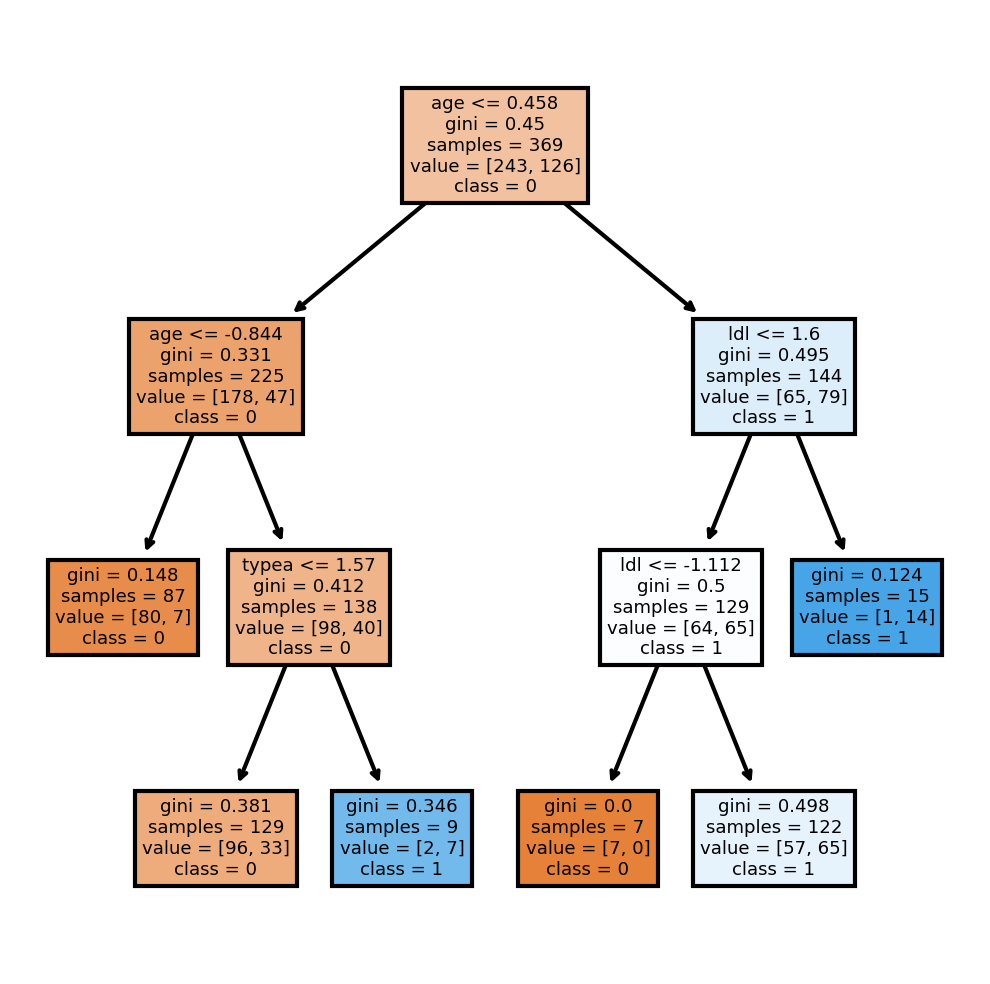

In [50]:
dt = DecisionTreeClassifier(ccp_alpha= 0.009, random_state=67) #selected a minimun ccp_alpha for some pruning
dt_vis = dt.fit(X_train, y_train)

cn = ['0', '1']  

# Then, use it in the plot_tree() function
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4, 4), dpi=300)
plot_tree(dt_vis,
          feature_names=feature_names,  
          class_names=cn,  
          filled=True)
plt.savefig('decision_tree.png')
plt.show()


## Random Forest

In [51]:
# set tuning values
tuned_parameters = [{"max_features": [2,4,6,8,9,"sqrt"]}]
rfCV = GridSearchCV(RandomForestClassifier(n_estimators=500,bootstrap=True,oob_score=True,random_state=0), tuned_parameters, scoring='accuracy',cv=10)
rfCV.fit(X_train, y_train)
print("Best parameters set found on validation set:")
print()
print(rfCV.best_params_)
print()
print("Grid scores on validation set:")
print()
means = rfCV.cv_results_["mean_test_score"]
stds = rfCV.cv_results_["std_test_score"]
for mean, std, params in zip(means, stds, rfCV.cv_results_["params"]):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std, params))

Best parameters set found on validation set:

{'max_features': 'sqrt'}

Grid scores on validation set:

0.683 (+/-0.044) for {'max_features': 2}
0.675 (+/-0.046) for {'max_features': 4}
0.656 (+/-0.043) for {'max_features': 6}
0.661 (+/-0.050) for {'max_features': 8}
0.670 (+/-0.047) for {'max_features': 9}
0.686 (+/-0.055) for {'max_features': 'sqrt'}


In [52]:
# predict test set labels
ypred_rf = rfCV.predict(X_test)

# accuracy score
accuracy_rf = accuracy_score(y_test,ypred_rf)

print('The accuracy score of the Random Forest Model is', accuracy_rf)

The accuracy score of the Random Forest Model is 0.7096774193548387


In [53]:
#Summary Statistics
print(classification_report(y_test, ypred_rf))

              precision    recall  f1-score   support

           0       0.74      0.85      0.79        59
           1       0.64      0.47      0.54        34

    accuracy                           0.71        93
   macro avg       0.69      0.66      0.66        93
weighted avg       0.70      0.71      0.70        93



In [54]:
#confusion matrix
confusion_matrix(y_test,ypred_rf)

array([[50,  9],
       [18, 16]], dtype=int64)

In [55]:
#ROC AUC Curve

# Calculate the false positive rate, true positive rate, and thresholds
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, ypred_rf)

# Calculate the Area Under the ROC Curve (AUC)
roc_auc_rf = auc(fpr_rf, tpr_rf)

print("AUC Score for Random Forest:", roc_auc_rf)

AUC Score for Random Forest: 0.6590229312063809


In [56]:
# get variable importance, e.g. mean decrease in gini index
rf = RandomForestClassifier(n_estimators=500,max_features=10,bootstrap=True,oob_score=True,random_state=0).fit(X_train,y_train)
rf_importances = rf.feature_importances_

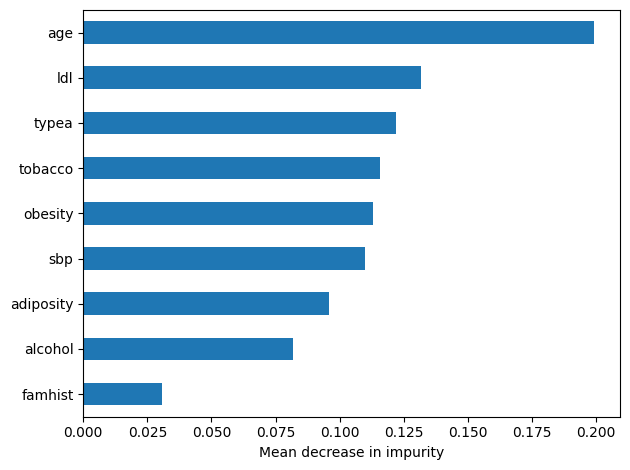

In [57]:
# Create a Series with feature importances and their corresponding names
forest_importances = pd.Series(rf_importances, index=feature_names)

# Sort the feature importances in ascending order
forest_importances_sorted = forest_importances.sort_values()

# Plot the feature importances
fig, ax = plt.subplots()
forest_importances_sorted.plot.barh()
ax.set_xlabel("Mean decrease in impurity")
fig.tight_layout()
plt.show()

## AdaBoost

In [58]:
ada = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3), n_estimators=100, random_state=0)

# set tuning values
tuned_parameters = [{"learning_rate": [0.001,0.01,0.1,1]}]
adaCV = GridSearchCV(ada, tuned_parameters, scoring='accuracy',cv=10)
adaCV.fit(X_train, y_train)
print("Best parameters set found on validation set:")
print()
print(adaCV.best_params_)
print()
print("Grid scores on validation set:")
print()
means = adaCV.cv_results_["mean_test_score"]
stds = adaCV.cv_results_["std_test_score"]
for mean, std, params in zip(means, stds, adaCV.cv_results_["params"]):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std, params))

Best parameters set found on validation set:

{'learning_rate': 0.01}

Grid scores on validation set:

0.694 (+/-0.058) for {'learning_rate': 0.001}
0.702 (+/-0.053) for {'learning_rate': 0.01}
0.686 (+/-0.077) for {'learning_rate': 0.1}
0.658 (+/-0.053) for {'learning_rate': 1}


In [59]:
# predict test set labels
ypred_ada = adaCV.predict(X_test)

# accuracy score
accuracy_ada = accuracy_score(y_test,ypred_ada)

print('The accuracy of Adaboost model is:',accuracy_ada)

The accuracy of Adaboost model is: 0.7096774193548387


In [60]:
#Summary Statistics
print(classification_report(y_test, ypred_ada))

              precision    recall  f1-score   support

           0       0.75      0.81      0.78        59
           1       0.62      0.53      0.57        34

    accuracy                           0.71        93
   macro avg       0.69      0.67      0.68        93
weighted avg       0.70      0.71      0.70        93



In [61]:
# Confusion Matrix
confusion_matrix(y_test,ypred_ada)

array([[48, 11],
       [16, 18]], dtype=int64)

In [62]:
# Calculate the false positive rate, true positive rate, and thresholds
fpr_ada, tpr_ada, thresholds_ada = roc_curve(y_test, ypred_ada)

# Calculate the Area Under the ROC Curve (AUC)
roc_auc_ada = auc(fpr_ada, tpr_ada)

print("AUC Score for Adaboost:", roc_auc_ada)

AUC Score for Adaboost: 0.6714855433698904


## Gradient boosting

In [63]:
grd = GradientBoostingClassifier(max_depth=3, n_estimators=100, random_state=0)

# set tuning values
tuned_parameters = [{"learning_rate": [0.001,0.01,0.1,1]}]
grdCV = GridSearchCV(grd, tuned_parameters, scoring='accuracy',cv=10)
grdCV.fit(X_train, y_train)
print("Best parameters set found on validation set:")
print()
print(grdCV.best_params_)
print()
print("Grid scores on validation set:")
print()
means = grdCV.cv_results_["mean_test_score"]
stds = grdCV.cv_results_["std_test_score"]
for mean, std, params in zip(means, stds, grdCV.cv_results_["params"]):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std, params))

Best parameters set found on validation set:

{'learning_rate': 0.01}

Grid scores on validation set:

0.659 (+/-0.012) for {'learning_rate': 0.001}
0.696 (+/-0.038) for {'learning_rate': 0.01}
0.645 (+/-0.048) for {'learning_rate': 0.1}
0.653 (+/-0.061) for {'learning_rate': 1}


In [64]:
# predict test set labels
ypred_grd = grdCV.predict(X_test)

# accuracy score
accuracy_grd = accuracy_score(y_test,ypred_grd)

print('The accuracy of Gradient Boosting model is:',accuracy_grd)

The accuracy of Gradient Boosting model is: 0.7204301075268817


In [65]:
#Summary Statistics
print(classification_report(y_test, ypred_grd))

              precision    recall  f1-score   support

           0       0.72      0.92      0.81        59
           1       0.72      0.38      0.50        34

    accuracy                           0.72        93
   macro avg       0.72      0.65      0.65        93
weighted avg       0.72      0.72      0.69        93



In [66]:
# Confusion Matrix 
confusion_matrix(y_test,ypred_grd)

array([[54,  5],
       [21, 13]], dtype=int64)

In [67]:
# Calculate the false positive rate, true positive rate, and thresholds
fpr_grd, tpr_grd, thresholds_grd = roc_curve(y_test, ypred_grd)

# Calculate the Area Under the ROC Curve (AUC)
roc_auc_grd = auc(fpr_grd, tpr_grd)

print("AUC Score for Gradient Boosting:", roc_auc_grd)

AUC Score for Gradient Boosting: 0.6488035892323031


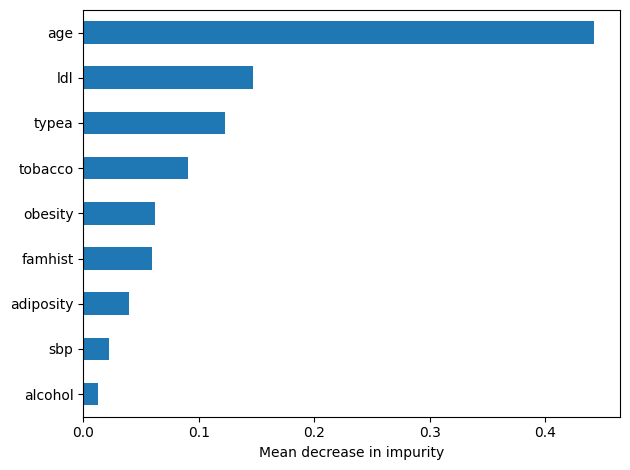

In [99]:
# get variable importance, e.g. mean decrease in gini index
grd = GradientBoostingClassifier(learning_rate=0.01, max_depth=3, n_estimators=100, random_state=0).fit(X_train,y_train)
grd_importances = grd.feature_importances_

# Create a Series with feature importances and their corresponding names
feature_importances_grd = pd.Series(grd_importances, index=feature_names)

# Sort the feature importances in ascending order
feature_importances_grd_sorted = feature_importances_grd.sort_values()

# Plot the feature importances
fig, ax = plt.subplots()
feature_importances_grd_sorted.plot.barh()
ax.set_xlabel("Mean decrease in impurity")
fig.tight_layout()
plt.show()

## SVM (Support Vector Machine)

In [70]:
# apply SVM with RBF kernel and tune gamma and C
tuned_parameters_rbf = [{"kernel": ["rbf"], "gamma": [1,1e-1,1e-2,1e-3, 1e-4], "C": [1, 10, 100,1000]}]
svmCV = GridSearchCV(SVC(), tuned_parameters_rbf, scoring='accuracy',cv=5)
svmCV.fit(X_train, y_train)
print("Best parameters set found on development set:")
print()
print(svmCV.best_params_)
print()
print("Grid scores on development set:")
print()
means = svmCV.cv_results_["mean_test_score"]
stds = svmCV.cv_results_["std_test_score"]
for mean, std, params in zip(means, stds, svmCV.cv_results_["params"]):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std, params))

Best parameters set found on development set:

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

Grid scores on development set:

0.648 (+/-0.011) for {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
0.710 (+/-0.053) for {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.710 (+/-0.025) for {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.659 (+/-0.005) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.659 (+/-0.005) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.632 (+/-0.016) for {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
0.669 (+/-0.043) for {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.721 (+/-0.042) for {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
0.713 (+/-0.023) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.659 (+/-0.005) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.632 (+/-0.016) for {'C': 100, 'gamma': 1, 'kernel': 'rbf'}
0.629 (+/-0.019) for {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
0.718 (+/-0.029) for {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
0.710 (+/-0.044) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0

In [71]:
# predict test set labels
ypred_svm = svmCV.predict(X_test)

# accuracy score 
accuracy_svm = accuracy_score(y_test,ypred_svm)

print('The accuracy of Support Vector Machine is:',accuracy_score(y_test,ypred_svm))

The accuracy of Support Vector Machine is: 0.7741935483870968


In [72]:
#Summary Statistics
print(classification_report(y_test, ypred_svm))

              precision    recall  f1-score   support

           0       0.77      0.92      0.84        59
           1       0.78      0.53      0.63        34

    accuracy                           0.77        93
   macro avg       0.78      0.72      0.73        93
weighted avg       0.78      0.77      0.76        93



In [73]:
# Confusion Matrix 
confusion_matrix(y_test,ypred_svm)

array([[54,  5],
       [16, 18]], dtype=int64)

In [74]:
#Calculate the false positive rate, true positive rate, and thresholds
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, ypred_svm)

# Calculate the Area Under the ROC Curve (AUC)
roc_auc_svm = auc(fpr_svm, tpr_svm)

print("AUC Score for Support Vector Machine:", roc_auc_svm)

AUC Score for Support Vector Machine: 0.7223330009970089


## LDA

In [75]:
#Fit LDA model on training set
lda = LDA()
lda.fit(X_train,y_train)

LinearDiscriminantAnalysis()

In [76]:
lda.means_

array([[-0.161284  , -0.20579743, -0.17951344, -0.21543065, -0.18359863,
        -0.04584272, -0.05723354, -0.1096075 , -0.27756781],
       [ 0.26080857,  0.35428157,  0.36047715,  0.3041661 ,  0.34843615,
         0.16178196,  0.11279712,  0.00699268,  0.52709154]])

In [77]:
lda.priors_

array([0.65853659, 0.34146341])

In [78]:
lda.scalings_

array([[ 0.17476326],
       [ 0.27873186],
       [ 0.33153855],
       [ 0.12266936],
       [ 0.37182292],
       [ 0.30995434],
       [-0.28505694],
       [ 0.01269562],
       [ 0.54694197]])

In [79]:
# predict test set labels
ypred_lda = lda.predict(X_test)

# accuracy score 
accuracy_lda = accuracy_score(y_test,ypred_lda)

print('The accuracy of LDA is:',accuracy_score(y_test,ypred_lda))

The accuracy of LDA is: 0.7634408602150538


In [80]:
#Summary Statistics
print(classification_report(y_test, ypred_lda))

              precision    recall  f1-score   support

           0       0.77      0.90      0.83        59
           1       0.75      0.53      0.62        34

    accuracy                           0.76        93
   macro avg       0.76      0.71      0.72        93
weighted avg       0.76      0.76      0.75        93



In [81]:
# Confusion Matrix 
confusion_matrix(y_test,ypred_lda)

array([[53,  6],
       [16, 18]], dtype=int64)

In [82]:
#Calculate the false positive rate, true positive rate, and thresholds
fpr_lda, tpr_lda, thresholds_lda = roc_curve(y_test, ypred_lda)

# Calculate the Area Under the ROC Curve (AUC)
roc_auc_lda  = auc(fpr_lda, tpr_lda)

print("AUC Score for LDA:", roc_auc_lda)

AUC Score for LDA: 0.7138584247258225


## QDA

In [83]:
#Fit GDA model on training set
qda = QDA()
qda.fit(X_train,y_train)

QuadraticDiscriminantAnalysis()

In [84]:
# predict test set labels
ypred_qda = qda.predict(X_test)

# accuracy score 
accuracy_qda = accuracy_score(y_test,ypred_qda)

print('The accuracy of QDA is:',accuracy_score(y_test,ypred_qda))


The accuracy of QDA is: 0.7634408602150538


In [85]:
np.mean(ypred_qda== y_test)

0.7634408602150538

In [86]:
qda_pred_prob = qda.predict_proba(X_test)
qda_pred_prob

array([[8.65857832e-01, 1.34142168e-01],
       [8.87190386e-01, 1.12809614e-01],
       [4.67409828e-01, 5.32590172e-01],
       [7.97555668e-01, 2.02444332e-01],
       [7.35690507e-01, 2.64309493e-01],
       [7.66865351e-01, 2.33134649e-01],
       [7.80862768e-01, 2.19137232e-01],
       [4.90434095e-01, 5.09565905e-01],
       [2.57773418e-01, 7.42226582e-01],
       [4.75174905e-01, 5.24825095e-01],
       [5.58534468e-01, 4.41465532e-01],
       [1.33195372e-03, 9.98668046e-01],
       [7.92244327e-01, 2.07755673e-01],
       [7.32663170e-01, 2.67336830e-01],
       [6.76646418e-01, 3.23353582e-01],
       [7.66205469e-01, 2.33794531e-01],
       [9.99262328e-01, 7.37671771e-04],
       [8.57143392e-01, 1.42856608e-01],
       [5.72623825e-01, 4.27376175e-01],
       [8.01608440e-03, 9.91983916e-01],
       [5.16870128e-01, 4.83129872e-01],
       [4.80220166e-01, 5.19779834e-01],
       [9.99511931e-01, 4.88068721e-04],
       [7.58455302e-02, 9.24154470e-01],
       [9.103675

In [87]:
#Summary Statistics
print(classification_report(y_test, ypred_qda))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83        59
           1       0.73      0.56      0.63        34

    accuracy                           0.76        93
   macro avg       0.75      0.72      0.73        93
weighted avg       0.76      0.76      0.76        93



In [88]:
# Confusion Matrix 
confusion_matrix(y_test,ypred_qda)

array([[52,  7],
       [15, 19]], dtype=int64)

In [89]:
#Calculate the false positive rate, true positive rate, and thresholds
fpr_qda, tpr_qda, thresholds_qda = roc_curve(y_test, ypred_qda)

# Calculate the Area Under the ROC Curve (AUC)
roc_auc_qda  = auc(fpr_qda, tpr_qda)

print("AUC Score for QDA:", roc_auc_qda)

AUC Score for QDA: 0.7200897308075773


## Naive Bayes

In [90]:
#Fit the model on training set
NB = GaussianNB()
NB.fit(X_train,y_train)

GaussianNB()

In [91]:
NB.theta_

array([[-0.161284  , -0.20579743, -0.17951344, -0.21543065, -0.18359863,
        -0.04584272, -0.05723354, -0.1096075 , -0.27756781],
       [ 0.26080857,  0.35428157,  0.36047715,  0.3041661 ,  0.34843615,
         0.16178196,  0.11279712,  0.00699268,  0.52709154]])

In [92]:
NB.var_

array([[0.68827526, 0.62984236, 0.84790969, 0.92262023, 0.90339431,
        0.98734959, 0.95983139, 0.74556839, 1.0341345 ],
       [1.41648939, 1.42921584, 1.22767472, 0.82875415, 0.99795953,
        1.0948032 , 1.1834651 , 0.9098644 , 0.56831288]])

In [93]:
# predict test set labels
ypred_nb = NB.predict(X_test)

# accuracy score 
accuracy_nb = accuracy_score(y_test,ypred_nb)

print('The accuracy of Naive Bayes is:',accuracy_score(y_test,ypred_nb))

The accuracy of Naive Bayes is: 0.7526881720430108


In [94]:
#Summary Statistics
print(classification_report(y_test, ypred_nb))

              precision    recall  f1-score   support

           0       0.85      0.75      0.79        59
           1       0.63      0.76      0.69        34

    accuracy                           0.75        93
   macro avg       0.74      0.76      0.74        93
weighted avg       0.77      0.75      0.76        93



In [95]:
# Confusion Matrix 
confusion_matrix(y_test,ypred_nb)

array([[44, 15],
       [ 8, 26]], dtype=int64)

In [96]:
#Calculate the false positive rate, true positive rate, and thresholds
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, ypred_nb)

# Calculate the Area Under the ROC Curve (AUC)
roc_auc_nb  = auc(fpr_nb, tpr_nb)

print("AUC Score for QDA:", roc_auc_nb)

AUC Score for QDA: 0.7552342971086741


## ROC CURVE COMPARISON FOR ALL MODELS

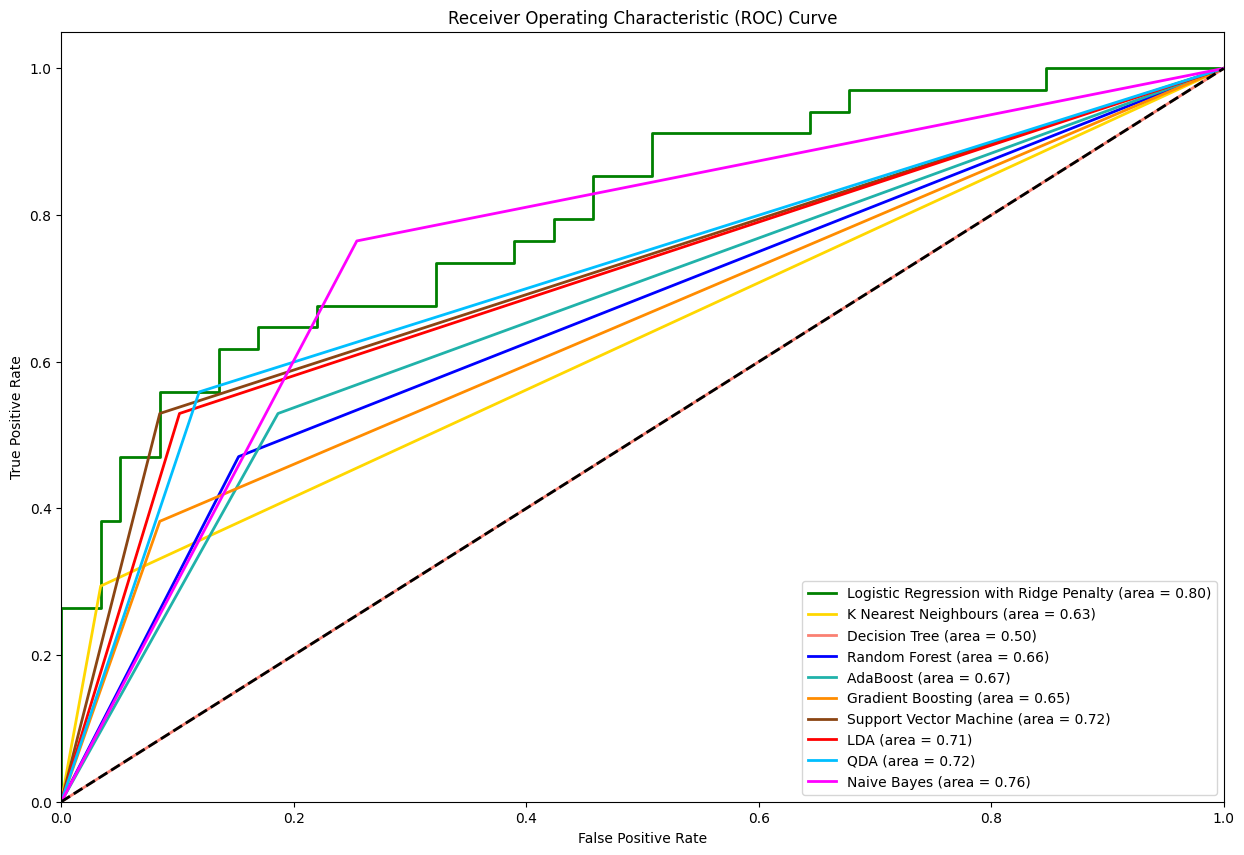

In [97]:
plt.figure(figsize=(15,10 ))  # Adjust the width and height

# Logistic Regression with Ridge Penalty
plt.plot(fpr, tpr, color='green', lw=2, label='Logistic Regression with Ridge Penalty (area = %0.2f)' % roc_auc)

# K Nearest Neighbours
plt.plot(fpr_knn, tpr_knn, color='gold', lw=2, label='K Nearest Neighbours (area = %0.2f)' % roc_auc_knn)

# Decision Tree
plt.plot(fpr_dt, tpr_dt, color='salmon', lw=2, label='Decision Tree (area = %0.2f)' % roc_auc_dt)

# Random Forest
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label='Random Forest (area = %0.2f)' % roc_auc_rf)

# AdaBoost
plt.plot(fpr_ada, tpr_ada, color='lightseagreen', lw=2, label='AdaBoost (area = %0.2f)' % roc_auc_ada)

# Gradient Boosting
plt.plot(fpr_grd, tpr_grd, color='darkorange', lw=2, label='Gradient Boosting (area = %0.2f)' % roc_auc_grd)

# Support Vector Machine
plt.plot(fpr_svm, tpr_svm, color='saddlebrown', lw=2, label='Support Vector Machine (area = %0.2f)' % roc_auc_svm)

# LDA
plt.plot(fpr_lda, tpr_lda, color='red', lw=2, label='LDA (area = %0.2f)' % roc_auc_lda)

# QDA
plt.plot(fpr_qda, tpr_qda, color='deepskyblue', lw=2, label='QDA (area = %0.2f)' % roc_auc_qda)

# Naive Bayes
plt.plot(fpr_nb, tpr_nb, color='magenta', lw=2, label='Naive Bayes (area = %0.2f)' % roc_auc_nb)


# Plot the diagonal line (random classifier)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')


plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

plt.savefig("ROC Curve Comparison.png")


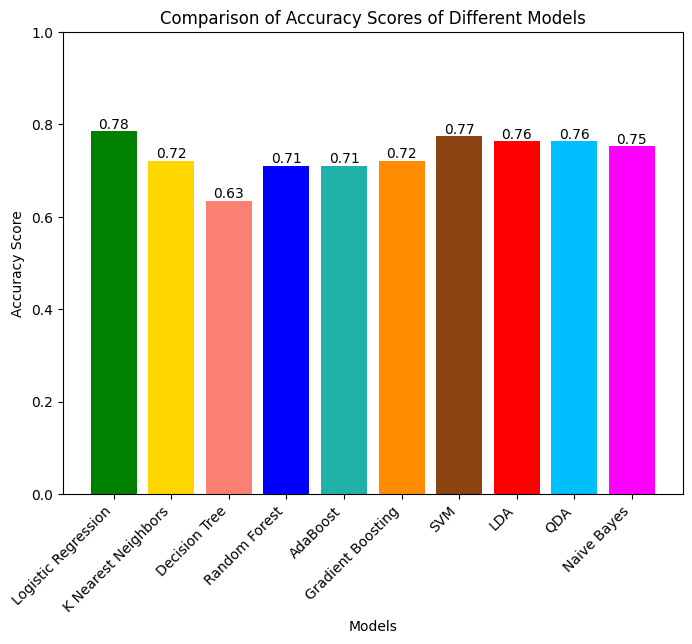

In [98]:
# Accuracy Score Comparison

# Models names
models = ['Logistic Regression', 'K Nearest Neighbors', 'Decision Tree','Random Forest', 'AdaBoost', 'Gradient Boosting', 'SVM','LDA','QDA','Naive Bayes']

# Accuracy scores of the models
accuracy_scores = [accuracy_lr_l2, accuracy_knn,accuracy_dt, accuracy_rf,accuracy_ada, accuracy_grd, accuracy_svm,accuracy_lda,accuracy_qda,accuracy_nb]

# Define different colors for each bar
colors = ['green','gold','salmon', 'blue', 'lightseagreen', 'darkorange','saddlebrown','red','deepskyblue','magenta']

# Plotting the bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(models, accuracy_scores, color=colors)
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.title('Comparison of Accuracy Scores of Different Models')
plt.ylim(0.0, 1.0)  # Set y-axis limits from 0 to 1
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Add text annotations on each bar
for bar, score in zip(bars, accuracy_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{score:.2f}', 
             ha='center', va='bottom', color='black')

plt.savefig("Accuracy Score Comparison.png")

plt.show()